In [1]:
import findspark


In [2]:
findspark.init(spark_home="/opt/local/spark/spark-2.0.0-bin-hadoop2.7/")

In [3]:
import pyspark
from pyspark.sql import SQLContext

In [4]:
sc = pyspark.SparkContext()
print(sc)

In [59]:
from __future__ import print_function
import scipy
import numpy
import sklearn
from functools import reduce
from operator import add

In [10]:
mat_fl = ('/Users/simondi/PHD/data/data/sysvirdrug/integrated_data_files/rnai.screen.raw.tsv')

Read the data to RDD

In [42]:
rdd = sc.textFile(mat_fl) \
        .filter(lambda line: not line.startswith("Virus")) \
        .filter(lambda line: line.strip().split("\t")[6] != "Viability") \
        .map(lambda line: numpy.array([x for i, x in enumerate(line.strip().split("\t")) if i < 100]))

In [43]:
rdd.take(5)

[array(['CHIKV', '1', '1', '1', '1', 'NA', 'Readout', '20610', 'GFP', 'NA',
        'Dharmacon', 'NA', 'Kinome', 'MRC5', 'IR', 'NA', 'pooled', 'NA'], 
       dtype='<U9'),
 array(['CHIKV', '1', '1', '1', '2', 'aak1', 'Readout', '18100', 'GFP', '0',
        'Dharmacon', 'D-005300-01,D-005300-02,D-005300-03,D-005300-04',
        'Kinome', 'MRC5', 'IR', 'NA', 'pooled', '22848'], 
       dtype='<U47'),
 array(['CHIKV', '1', '1', '1', '3', 'aatk', 'Readout', '32730', 'GFP', '0',
        'Dharmacon', 'D-005301-02,D-005301-03,D-005301-04,D-005301-05',
        'Kinome', 'MRC5', 'IR', 'NA', 'pooled', '9625'], 
       dtype='<U47'),
 array(['CHIKV', '1', '1', '1', '4', 'cerk', 'Readout', '19250', 'GFP', '0',
        'Dharmacon', 'D-004061-01,D-004061-02,D-004061-03,D-004061-04',
        'Kinome', 'MRC5', 'IR', 'NA', 'pooled', '64781'], 
       dtype='<U47'),
 array(['CHIKV', '1', '1', '1', '5', 'rapgef4', 'Readout', '33210', 'GFP',
        '0', 'Dharmacon', 'D-009511-01,D-009511-02,D-009511-03,D

In [55]:
from pyspark.mllib.linalg import Vectors, DenseMatrix
readout = rdd.filter(lambda x: str(x[7]) != "NA").map(lambda x: Vectors.dense(float(x[7])))
readout.take(5)

[DenseVector([20610.0]),
 DenseVector([18100.0]),
 DenseVector([32730.0]),
 DenseVector([19250.0]),
 DenseVector([33210.0])]

In [56]:
from pyspark.mllib.clustering import KMeans, KMeansModel
clusters = KMeans.train(readout, 10, maxIterations=10, initializationMode="random")

In [57]:
import matplotlib.pyplot as plt

Here I plot the clustering!

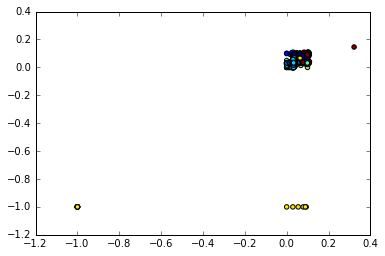

In [88]:
x = rdd.map(lambda x: x[0]).collect()
y = rdd.map(lambda x: x[1]).collect()
centers = rdd.map(lambda x: clusters.predict(x)).collect()
plt.scatter(x, y, c=centers)
plt.show()

In [ ]:
sc.stop()